In [10]:
!pip install librosa


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 288.2/288.2 kB 613.6 kB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Marina\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~atplotlib\\ft2font.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#The output of this section is the CSV files with the data to be handle by the model
CREATE_CSV_FILES = True

In [6]:
# Defines the names of the CSV files
TRAIN_CSV_FILE = "Speaker_Train_File.csv"
TEST_CSV_FILE = "Speaker_Test_File.csv"

In [11]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
from matplotlib import cm
import pandas as pd
import librosa
import zipfile
import csv
import os
from sklearn import metrics
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import csv
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 41):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    for filename in os.listdir(soundFilesFolder):
        if filename.endswith('.wav'):
            number = f'{soundFilesFolder}/{filename}'
            y, sr = librosa.load(number, mono=True, duration=30)
            # remove leading and trailing silence
            y, index = librosa.effects.trim(y)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 40)
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

In [ ]:
if (CREATE_CSV_FILES == True):
    extractWavFeatures("Speaker_Train_Data", TRAIN_CSV_FILE)
    extractWavFeatures("Speaker_Test_Data", TEST_CSV_FILE)
    print("CSV files are created")
else:
    print("CSV files creation is skipped")

The features of the files in the folder Speaker_Train_Data will be saved to Speaker_Train_File.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40', 'label']
End of extractWavFeatures
The features of the files in the folder Speaker_Test_Data will be saved to Speaker_Test_File.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14

In [ ]:
#Reading a dataset and convert file name to corresbonding umnber
def preProcessData(csvFileName):
    header_name_list = ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40', 'label']
    print(csvFileName+ " will be preprocessed")
    data =  pd.read_csv(csvFileName)
#     data = pd.read_csv(csvFileName, skiprows=[1, 50]
    # we have 4 speakers: 
    # 0: Marina
    # 1: Mohab
    # 2: Omnia
    # 3: Youssef
    filenameArray = data['filename'] 
    speakerArray = []
#     print(filenameArray)
    for filename in filenameArray:
        #print(speaker)
        if "marina" in filename:
            speaker = 0
        elif "mohab" in filename:
            speaker = 1
# #         elif "omnia" in filename:
#                speaker = "2"
# #         elif "Youssef"n filename:
# #             speaker = "3"
        else: 
            speaker = "4"
#         print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
#     data.shape
#     print("Preprocessing is finished")
#     print(data['rmse'])
    print(data)
    return data

In [ ]:
trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)

Speaker_Train_File.csv will be preprocessed
        rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0   0.007610        1092.741159         1452.675884  2016.445893   
1   0.025625        2364.740968         2936.851934  5978.127769   
2   0.018947        1296.560988         1631.028960  2652.988503   
3   0.017168        1253.064143         1425.561648  2338.823562   
4   0.028327        2026.556424         2848.217220  5431.426193   
5   0.023835        2367.994979         3004.842011  6157.458349   
6   0.013829        1166.165148         1480.120272  2109.620577   
7   0.023275        2128.937290         2935.035825  5796.971774   
8   0.013633        1066.181390         1480.829474  2143.283650   
9   0.016291        1059.129002         1425.596731  2004.056064   
10  0.021183        2061.124293         2843.493893  5239.121943   
11  0.013171        1411.112761         1650.715694  2891.450275   
12  0.009261        1442.493989         1671.743065  3019.194336   
13  

In [ ]:
# Splitting the dataset into training, validation and testing dataset

X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)

Y from training data: (33,)
Y from validation data: (15,)
Y from test data: (24,)


In [ ]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)

X from training data (33, 45)
X from validation data (15, 45)
X from test data (24, 45)


In [ ]:
#Create an object (model)
dtr1 = DecisionTreeClassifier(max_depth =6, random_state = 42)
#Fit (train) the model
dtr1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

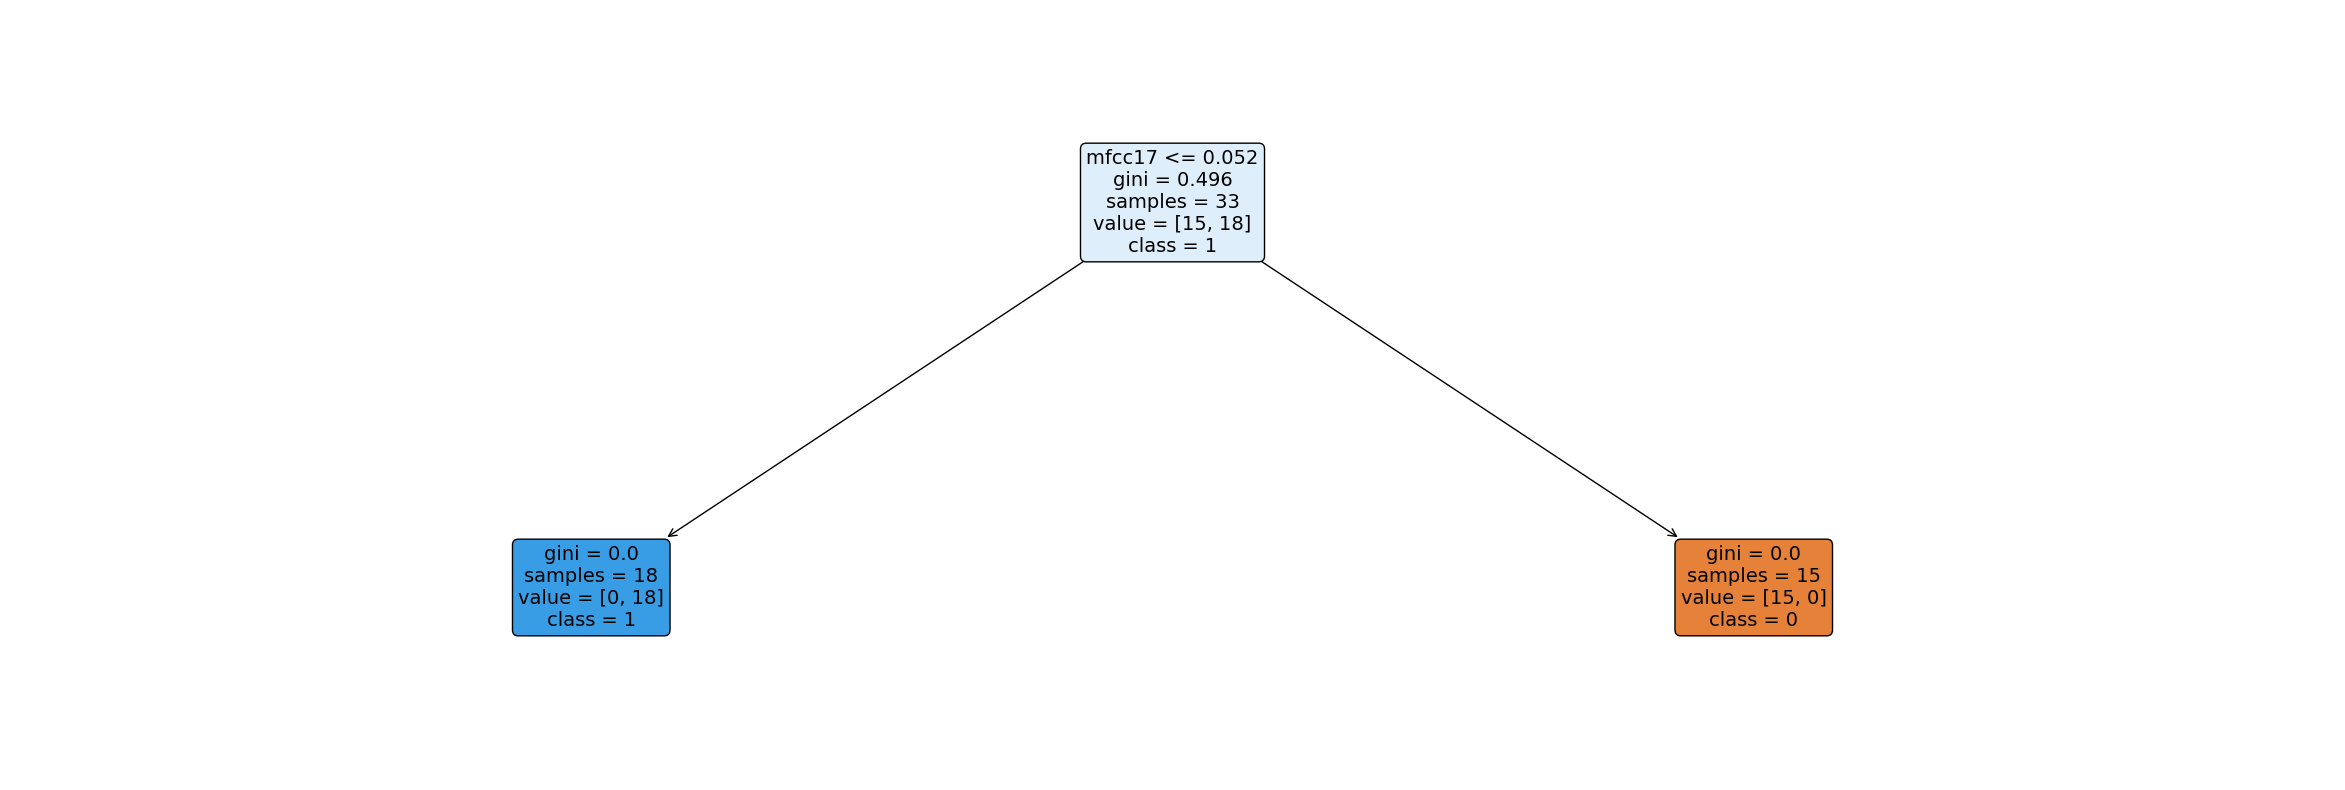

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10))
#create the tree plot
a = tree.plot_tree(dtr1,feature_names = list(['rmse', 'spectral_centroid', 'spectral_bandwidth', 
                   'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 
                   'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 
                   'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 
                   'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40']),
                   class_names = ["0", "1"],
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [ ]:
test_pred_decision_tree = dtr1.predict(X_test)
test_pred_decision_tree

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, test_pred_decision_tree))


Accuracy: 0.7083333333333334


In [ ]:
def report(X_data, y_data):
    #Confution Matrix and Classification Report
    Y_pred = dtr1.predict(X_data)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassification Report')
    target_names = ["Marina", "Mohab", "Unknown"]
    print(classification_report(y_test_num, Y_pred))

Classification Report for Test Data

[[ 5  7]
 [ 0 12]]


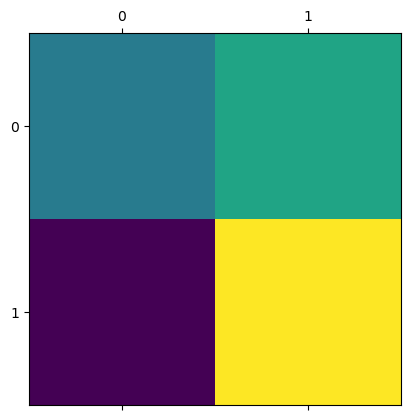


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.63      1.00      0.77        12

    accuracy                           0.71        24
   macro avg       0.82      0.71      0.68        24
weighted avg       0.82      0.71      0.68        24



In [ ]:
print("Classification Report for Test Data\n")
report(X_test, y_test)